In [35]:
#################################
#BASIC CNN WITH DATA CONSTRAINT 
#################################
#EARLIER CASE WE USED 
                     #TRAINING SET (8000 IMAGE ) 4000 CAT 4000 DOG IMAGE 
                     #TEST SET     (2000 IMAGE) 1000 CAT  1000 DOG IMAGE 
#IN THIS APPROACH WE WILL USE 
                    #TRAINING SET (3000 IMAGE ) 1500 CAT 1500 DOG IMAGE 
                    #TEST SET     (1000 IMAGE) 500 CAT  500 DOG IMAGE

#3 APPROACHES WE WILL FOLLOW 
                  # 1.BASIC CNN
                  # 2.CNN with regularization
                  # 3.CNN with data generator i.e data augmentation  

In [36]:
#####################################################################
#FIRST APPROACH 
 # 1.BASIC CNN
 #TRAINING ACCURACY 0.99
 #VALIDATION ACCURACY 0.75 
 #CONCLUSION OVERFITTED 
#####################################################################

In [37]:
#Mount Google drive
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
from zipfile import ZipFile
file_name = "/content/drive/My Drive/Colab Notebooks/dataset_cat_dog.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print("unzipping completed")

unzipping completed


In [39]:

import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array, array_to_img

%matplotlib inline

In [40]:

IMG_DIM = (150, 150)
#As we want         #TRAINING SET (3000 IMAGE ) 1500 CAT 1500 DOG IMAGE 
                    #TEST SET     (1000 IMAGE) 500 CAT  500 DOG IMAGE

cat_train_files = glob.glob('/content/dataset/training_set/cats/*')
dog_train_files = glob.glob('/content/dataset/training_set/dogs/*')
train_files=cat_train_files[:1500]+dog_train_files[:1500]
train_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in train_files]
train_imgs = np.array(train_imgs)
train_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in train_files]

cat_validation_files = glob.glob('/content/dataset/test_set/cats/*')
dog_validation_files = glob.glob('/content/dataset/test_set/dogs/*')
validation_files=cat_validation_files[:500]+dog_validation_files[:500]
validation_imgs = [img_to_array(load_img(img, target_size=IMG_DIM)) for img in validation_files]
validation_imgs = np.array(validation_imgs)
validation_labels = [fn.split('/')[-1].split('.')[0].strip() for fn in validation_files]

print('Train dataset shape:', train_imgs.shape, 
      '\tValidation dataset shape:', validation_imgs.shape)

Train dataset shape: (3000, 150, 150, 3) 	Validation dataset shape: (1000, 150, 150, 3)


In [41]:
#SCALE THE IMAGE AFTER CONVERTING INTO FLLOAT
train_imgs_scaled = train_imgs.astype('float32')
validation_imgs_scaled  = validation_imgs.astype('float32')
train_imgs_scaled /= 255
validation_imgs_scaled /= 255


In [42]:
#ENCODE LABEL :
# encode text category labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_labels)
train_labels_enc = le.transform(train_labels)
validation_labels_enc = le.transform(validation_labels)

In [43]:
#CREATE A MODEL
input_shape = (150, 150, 3)
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 36992)            

In [44]:
batch_size = 30
num_classes = 2
epochs = 30
#The batch_size indicates the total number of images passed to the model per iteration.
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/30
100/100 [==============================] - 6s 59ms/step - loss: 0.7742 - accuracy: 0.5593 - val_loss: 0.6584 - val_accuracy: 0.6620
Epoch 2/30
100/100 [==============================] - 6s 56ms/step - loss: 0.6236 - accuracy: 0.6633 - val_loss: 0.5759 - val_accuracy: 0.6840
Epoch 3/30
100/100 [==============================] - 6s 57ms/step - loss: 0.5558 - accuracy: 0.7133 - val_loss: 0.5433 - val_accuracy: 0.7270
Epoch 4/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4870 - accuracy: 0.7700 - val_loss: 0.6093 - val_accuracy: 0.6930
Epoch 5/30
100/100 [==============================] - 6s 57ms/step - loss: 0.4128 - accuracy: 0.8137 - val_loss: 0.6075 - val_accuracy: 0.7170
Epoch 6/30
100/100 [==============================] - 6s 56ms/step - loss: 0.3152 - accuracy: 0.8693 - val_loss: 0.6913 - val_accuracy: 0.7050
Epoch 7/30
100/100 [==============================] - 6s 57ms/step - loss: 0.2242 - accuracy: 0.9023 - val_loss: 0.7418 - val_accuracy: 0.7150

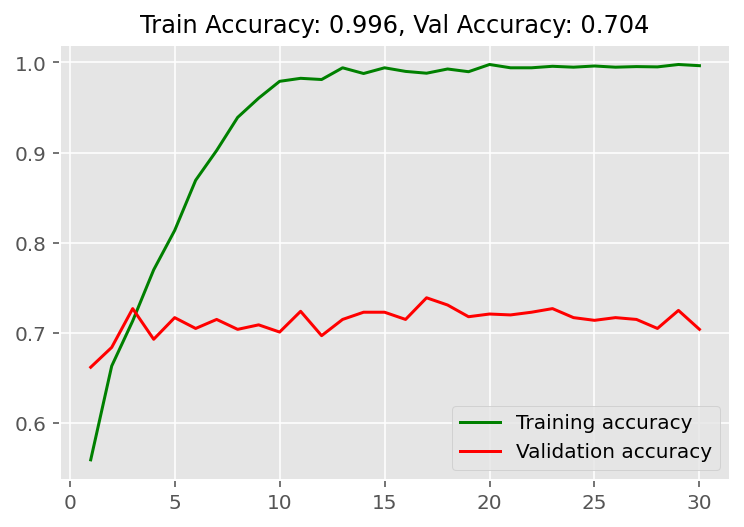

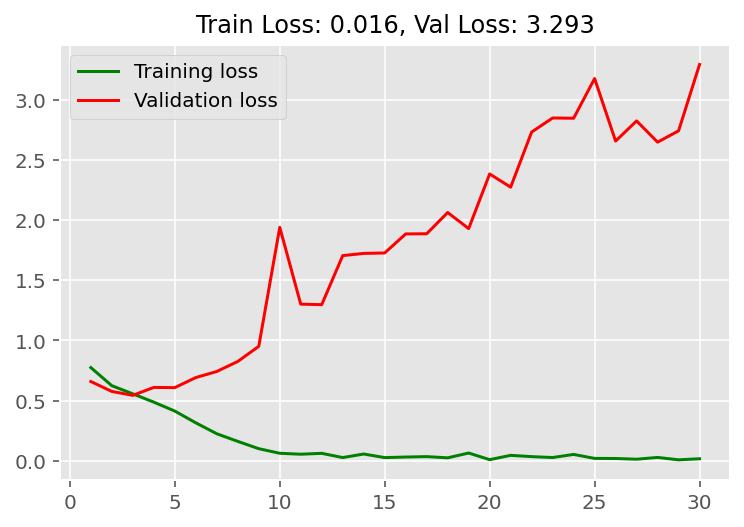

In [45]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [46]:
#####################################################################
#SECOND  APPROACH 
 # 1.BASIC CNN WITH DROP OUT LAYER i.e REGULARIZATION
 #TRAINING ACCURACY 0.95
 #VALIDATION ACCURACY 0.75 
 #CONCLUSION  STILL OVERFITTED 
#####################################################################

In [47]:
model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 15, 15, 128)      

In [49]:
batch_size = 30
num_classes = 2
epochs = 30
#The batch_size indicates the total number of images passed to the model per iteration.
history = model.fit(x=train_imgs_scaled, y=train_labels_enc,
                    validation_data=(validation_imgs_scaled, validation_labels_enc),
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)


Epoch 1/30
100/100 [==============================] - 5s 51ms/step - loss: 0.7818 - accuracy: 0.5200 - val_loss: 0.6890 - val_accuracy: 0.5570
Epoch 2/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6926 - accuracy: 0.5627 - val_loss: 0.6755 - val_accuracy: 0.5950
Epoch 3/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6599 - accuracy: 0.6117 - val_loss: 0.6572 - val_accuracy: 0.5970
Epoch 4/30
100/100 [==============================] - 5s 48ms/step - loss: 0.6103 - accuracy: 0.6737 - val_loss: 0.6066 - val_accuracy: 0.6680
Epoch 5/30
100/100 [==============================] - 5s 48ms/step - loss: 0.5675 - accuracy: 0.7213 - val_loss: 0.6684 - val_accuracy: 0.5900
Epoch 6/30
100/100 [==============================] - 5s 49ms/step - loss: 0.5419 - accuracy: 0.7423 - val_loss: 0.8890 - val_accuracy: 0.5610
Epoch 7/30
100/100 [==============================] - 5s 48ms/step - loss: 0.4848 - accuracy: 0.7717 - val_loss: 0.5549 - val_accuracy: 0.7340

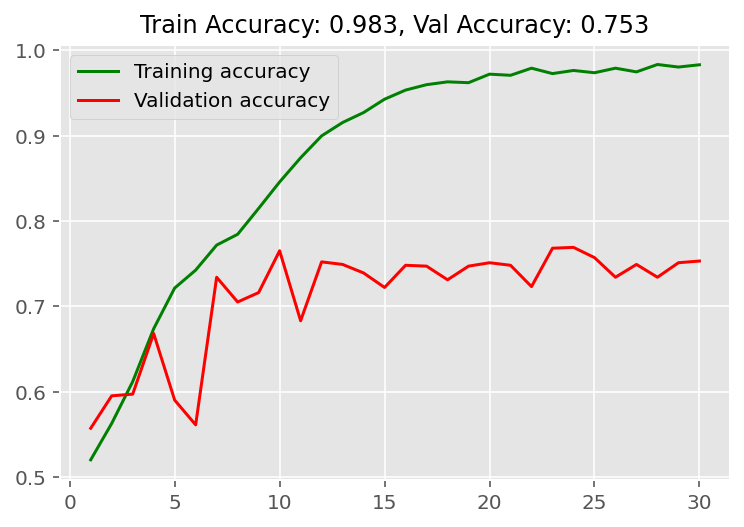

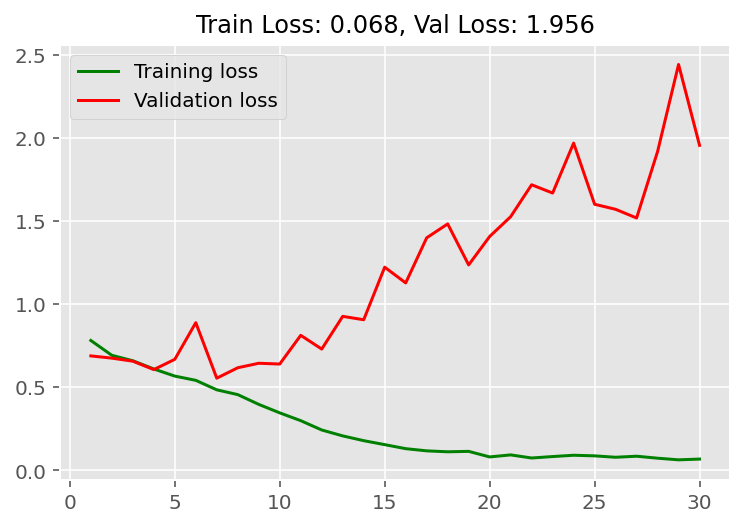

In [50]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()

In [51]:
#####################################################################
#THIRD  APPROACH 
 # 1.BASIC CNN WITH DATA AUGMENTATION AND REGULARIZATION 
 #TRAINING ACCURACY 0.82
 #VALIDATION ACCURACY 0.73 
 #CONCLUSION   ACCURACY LOW BUT MODEL NOT OVERFITETD  
#####################################################################

In [52]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')

val_datagen = ImageDataGenerator(rescale=1./255)

In [55]:
train_generator = train_datagen.flow(train_imgs, train_labels_enc, batch_size=30)
val_generator = val_datagen.flow(validation_imgs, validation_labels_enc, batch_size=20)
#The train_generator generates 30 images each time, so we will use the steps_per_epoch = 100 to train the model on 3,000 randomly generated images from the training data for each epoch.
#The train_generator generates 20 images each time, so we will use the steps_per_epoch = 50 to train the model on 1,000 randomly generated images from the training data for each epoch.

In [53]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.models import Sequential
from keras import optimizers

model = Sequential()

model.add(Conv2D(16, kernel_size=(3, 3), activation='relu', 
                 input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 72, 72, 64)        9280      
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 15, 15, 128)      

In [56]:
history = model.fit_generator(train_generator, steps_per_epoch=100, epochs=100,
                              validation_data=val_generator, validation_steps=50, verbose=1)

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
100/100 [==============================] - 18s 176ms/step - loss: 0.6931 - accuracy: 0.5037 - val_loss: 0.6897 - val_accuracy: 0.5170
Epoch 2/100
100/100 [==============================] - 17s 174ms/step - loss: 0.6801 - accuracy: 0.5607 - val_loss: 0.7997 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6702 - accuracy: 0.5893 - val_loss: 0.6579 - val_accuracy: 0.6100
Epoch 4/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6514 - accuracy: 0.6237 - val_loss: 0.6411 - val_accuracy: 0.6330
Epoch 5/100
100/100 [==============================] - 17s 168ms/step - loss: 0.6448 - accuracy: 0.6267 - val_loss: 0.6153 - val_accuracy: 0.6610
Epoch 6/100
100/100 [==============================] - 17s 165ms/step - loss: 0.6351 - accuracy: 0.6350 - val_loss: 0.6480 - val_accuracy: 0.6230
Epoch 7/100
100/100 [===========================

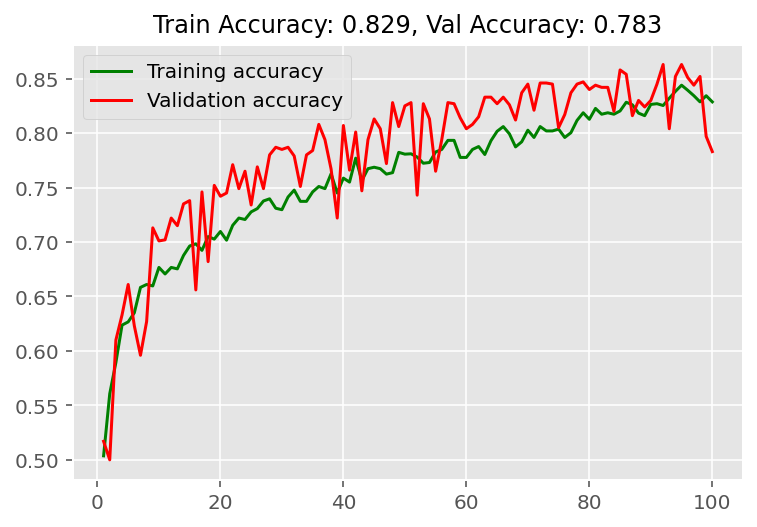

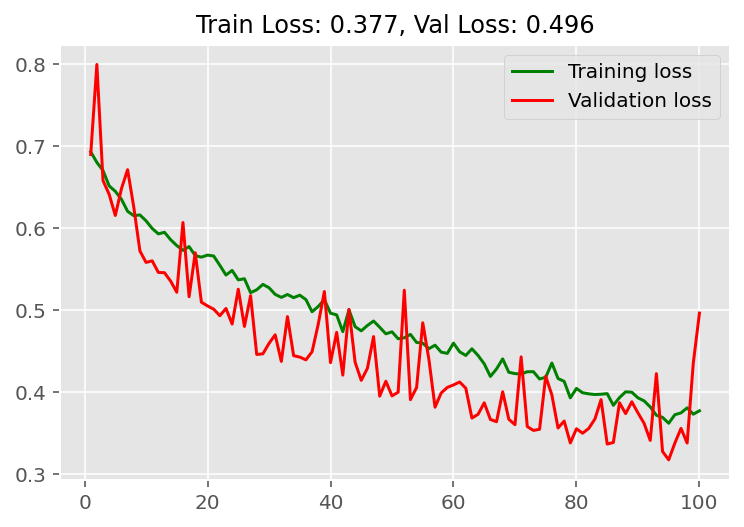

In [57]:

import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()